<h1>In-Depth Analysis of Air Quality Index(AQI) in Delhi</h1>

<h3>Introduction</h3>

Air Quality Index (AQI) is a critical indicator of environmental health,reflecting the concentration of various pollutants in the atmosphere.High AQI values signify poor Air Quality,which poses significant risks to public health,ecosystems,and overall Quality of life.Delhi,the Capital City of India,has been grappling with severe air pollution issues for several years,making it an ideal Case Study for analyzing AQI dynamics.

<h3>Objectives</h3>

The primary Objective of this analysis is to comprehensively examine the AQI in Delhi by:

-Identifying and evaluating the key pollutants contributing to air quality Degradation.
-Understanding the seasonal varitions and their impact on AQI Levels.
-Assessing the influence of Geographical factors on air Quality across different regions of Delhi.
-providing Actionable Insights and recommendations to improve air quality and mitigate public health risks.

<h3>Research Questions</h3>

To provide this analysis,the following Research Questions have been formulated:

1.Key pollutants:
   RQ1:What are the primary pollutants contributing to Delhi's AQI,and how do their concentrations vary over time?
   RQ2:How do levels of CO,NO,NO2,O2,SO2,PM2.5,PM10, and NH3 correlate with overall AQI values?

2.Seasonal Variations
   RQ3:How does AQI in Delhi fluctuate across different seasons(winter,summer,monsoon,post-monsoon)?
   RQ4:what are the peak pollution periods within each seasonand what factors contribute to these spikes?

3.GeoGraphical Factors
   RQ5:How does AQI vary across different regions or districts within delhi?
   RQ6:What geographical features(eg:proximity to industrial areas,traffic density,green cover)influence Air quality in these regions?

4.Impact on Public Health
   RQ7:What is the relationship between AQI levels and public health indicators(eg:respiratory issues,hospital admissions)?
   RQ8:How effective are current Air Quality improvement measures in mitigating health impacts?

<h1>STEP1)Data Loading And Preparation: </h1>

The cleaned Data set is loaded from the CSV file.
Additional columns for month and season are added to analyze seasonal variations.

In [3]:
import pandas as pd
import numpy as np

#load AQI data
df=pd.read_csv("/home/prasanna/Desktop/delhiaqi.csv")

In [4]:
#convert date column to datetime
df['date']=pd.to_datetime(df['date'])

In [5]:
import pandas as pd
import scipy.stats as stats
import numpy as np

#load AQI data
df=pd.read_csv("/home/prasanna/Desktop/delhiaqi.csv")

In [6]:
#convert date column to datetime
df['date']=pd.to_datetime(df['date'],errors='coerce')

In [7]:
#Handle any NaT values by dropping these rows:
df=df.dropna(subset=['date'])

In [8]:
#set date as index
df.set_index('date',inplace=True)

In [9]:
#handle missing values by interpolation
df.interpolate(method='time',inplace=True)

In [10]:
#detect and remove outliers using Z-Score
numeric_cols=['co','no','no2','o3','so2','pm2_5','pm10','nh3']
df=df[(np.abs(stats.zscore(df[numeric_cols]))<3).all(axis=1)]

In [11]:
#verify the dataframe
print(df.head())
print(df.isnull().sum())

                          co     no    no2    o3    so2   pm2_5    pm10    nh3
date                                                                          
2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   5.83
2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   7.66
2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68  11.40
2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12  13.55
2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80  14.19
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [12]:
#convert pollutant columns to numeric,coercing errors to NaN
for col in numeric_cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')

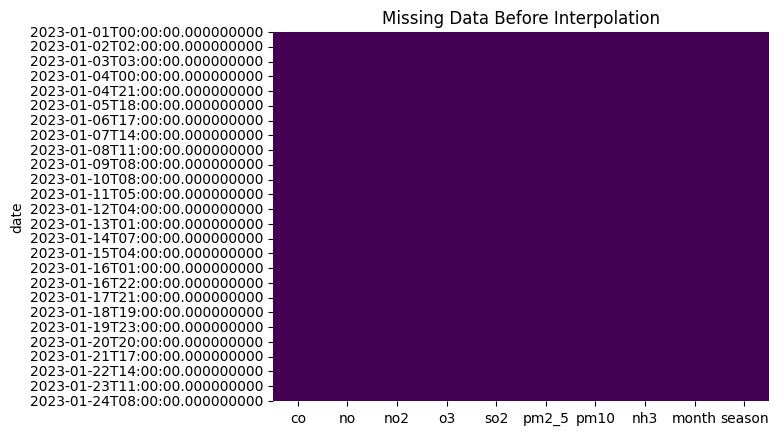

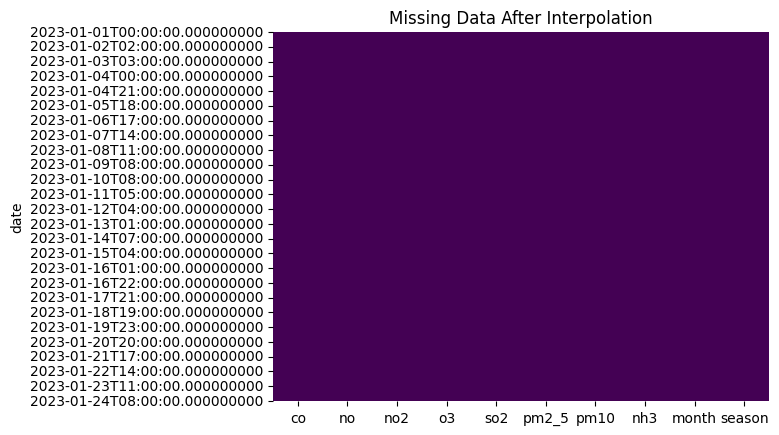

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data before interpolation
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Before Interpolation")
plt.show()

df.index = pd.to_datetime(df.index)  # Convert index to datetime if not already

df.interpolate(method='time', inplace=True)

# Visualize missing data after interpolation
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data After Interpolation")
plt.show()


In [14]:
df.to_csv('delhi_aqi_cleaned.csv')

In [15]:
# Ensure index is a datetime type
df.index = pd.to_datetime(df.index)

# Extract month from the datetime index
df['month'] = df.index.month

# Add a season column based on month
df['season'] = df['month'].apply(lambda x: 
    'Winter' if x in [12, 1, 2] else
    'Summer' if x in [3, 4, 5] else
    'Monsoon' if x in [6, 7, 8] else
    'Post-Monsoon'
)

<h1>Step2)Visualization of Seasonal Variations</h1>

A Box Plot for each pollutant across the four seasons is created,allowing you to see how pollutants like PM2.5,CO,N02,etc.,vary throughout the year

In [17]:
#visualize seasonal variations in key pollutants
pollutants=['co','no','no2','o3','so2','pm2_5','pm10','nh3']

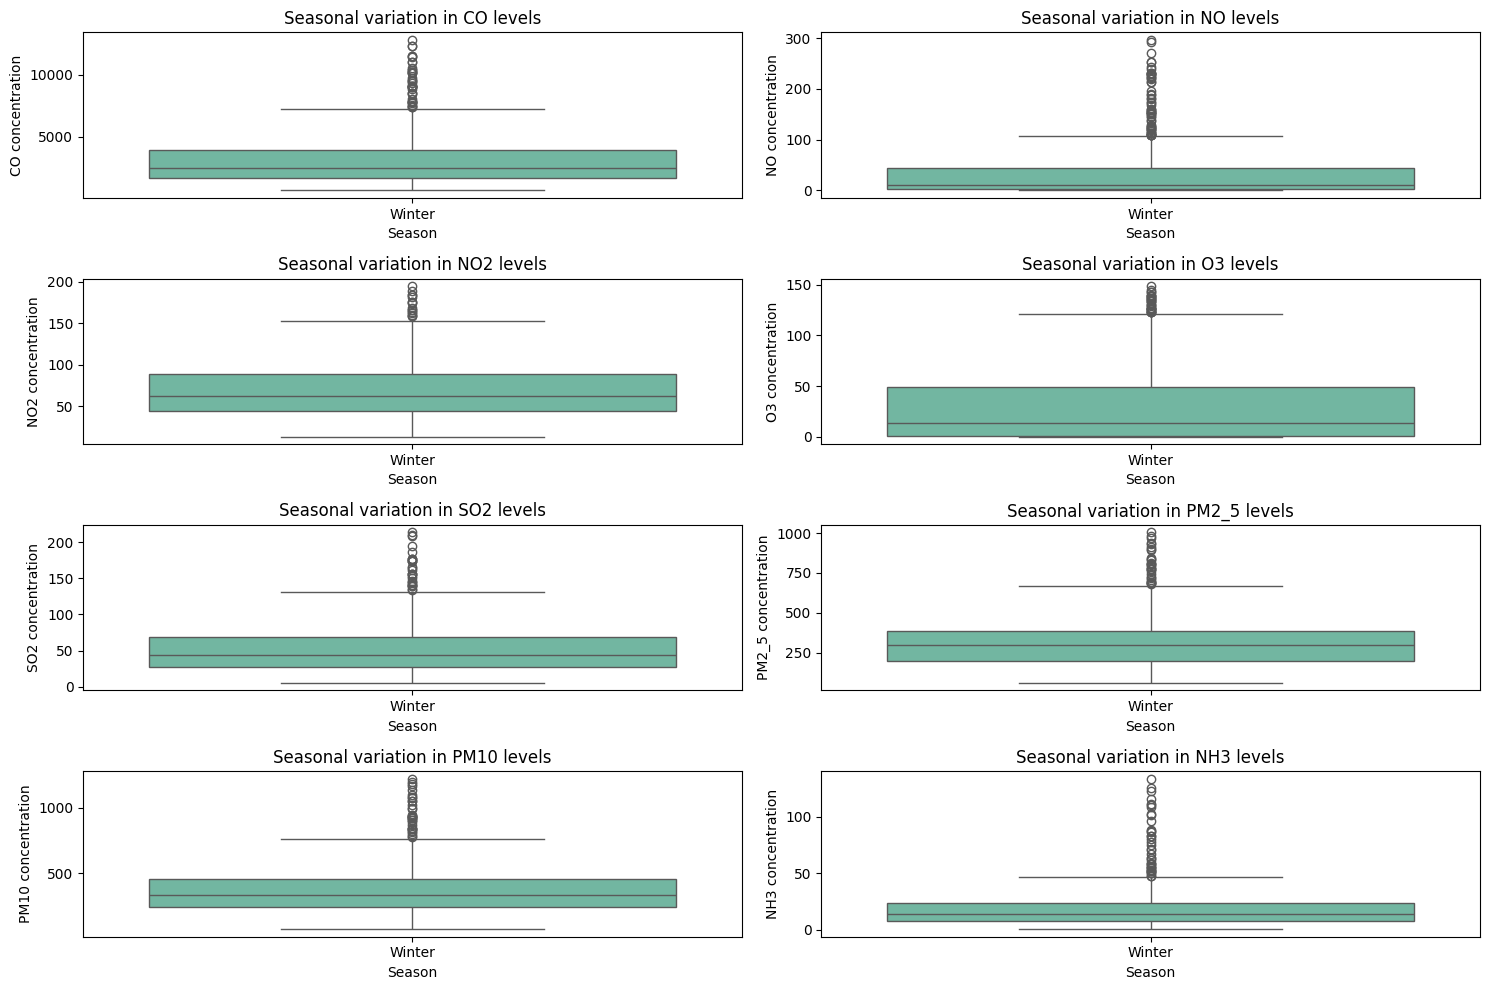

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

pollutants=['co','no','no2','o3','so2','pm2_5','pm10','nh3']
# Define figure size
plt.figure(figsize=(15, 10))

# Loop through each pollutant and create subplots
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='season', y=pollutant, hue='season', data=df, palette='Set2', legend=False)
    plt.title(f"Seasonal variation in {pollutant.upper()} levels")
    plt.ylabel(f"{pollutant.upper()} concentration")
    plt.xlabel("Season")

plt.tight_layout() 
plt.show()

<h1>Step3)Correlation Analysis:</h1>

A Correlation Heatmap shows the relationships between different pollutants,giving insights into how certain pollutants might rise together.

In [20]:
#correlation Analysis between pollutants
corr_matrix=df[pollutants].corr()

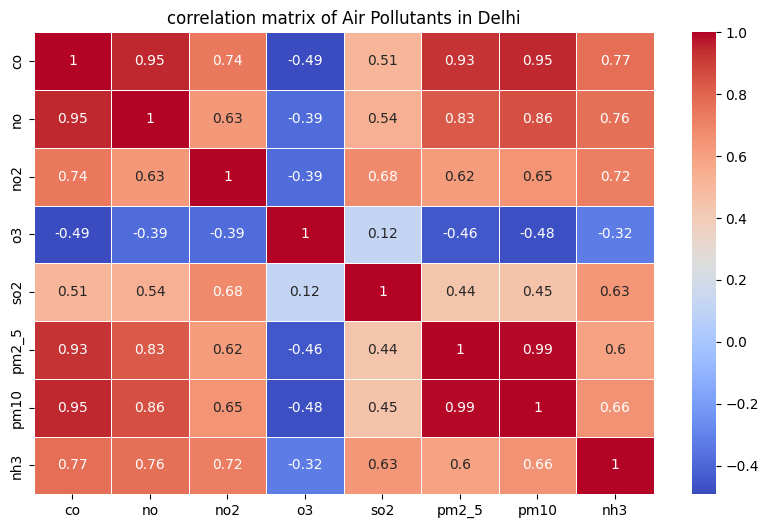

In [21]:
#plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title("correlation matrix of Air Pollutants in Delhi")
plt.show()

<h1>Step4)Time Series Plot</h1>

A Time series plot of key pollutants(PM2.5,PM10,CO,NO2)gives an overview of how these pollutants fluctuate over time

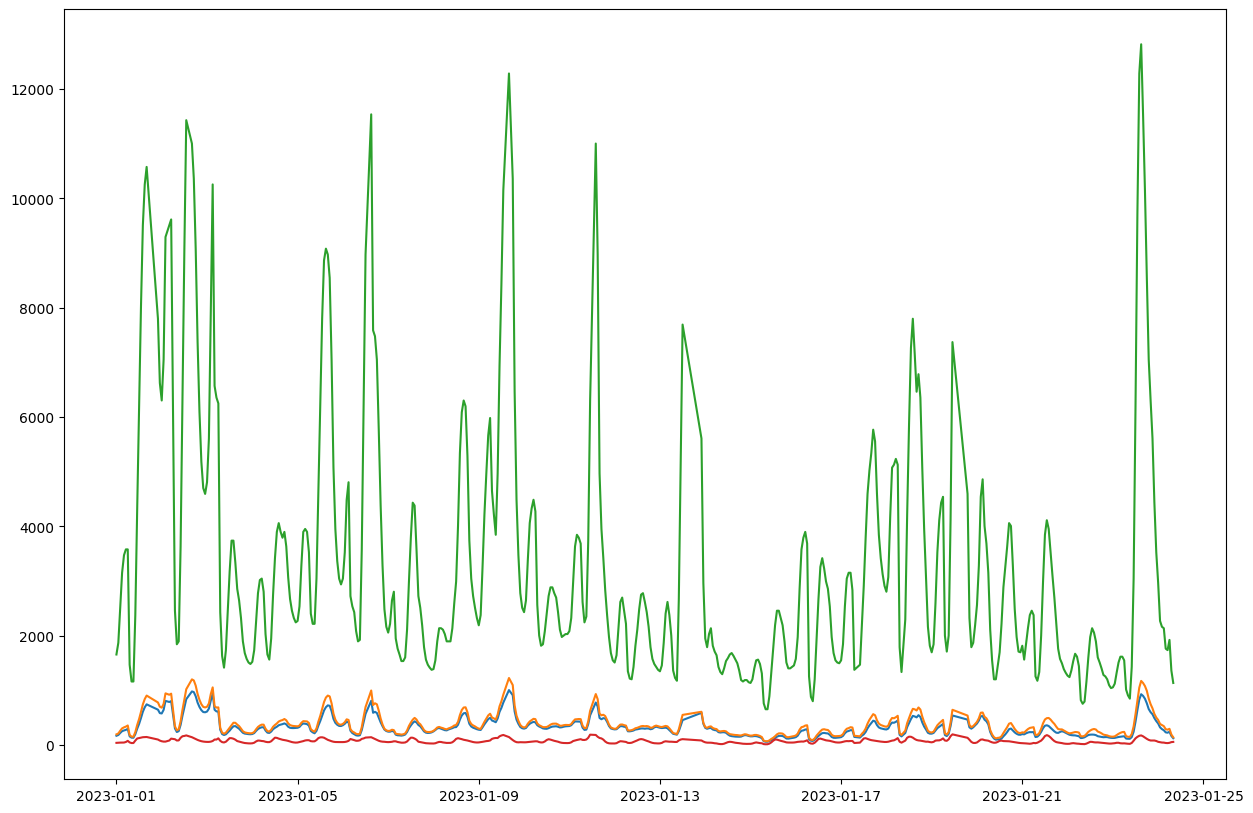

In [22]:
#time series plot for key pollutants over the year
plt.figure(figsize=(15,10))
for pollutant in ['pm2_5','pm10','co','no2']:
    plt.plot(df.index,df[pollutant],label=pollutant.upper())

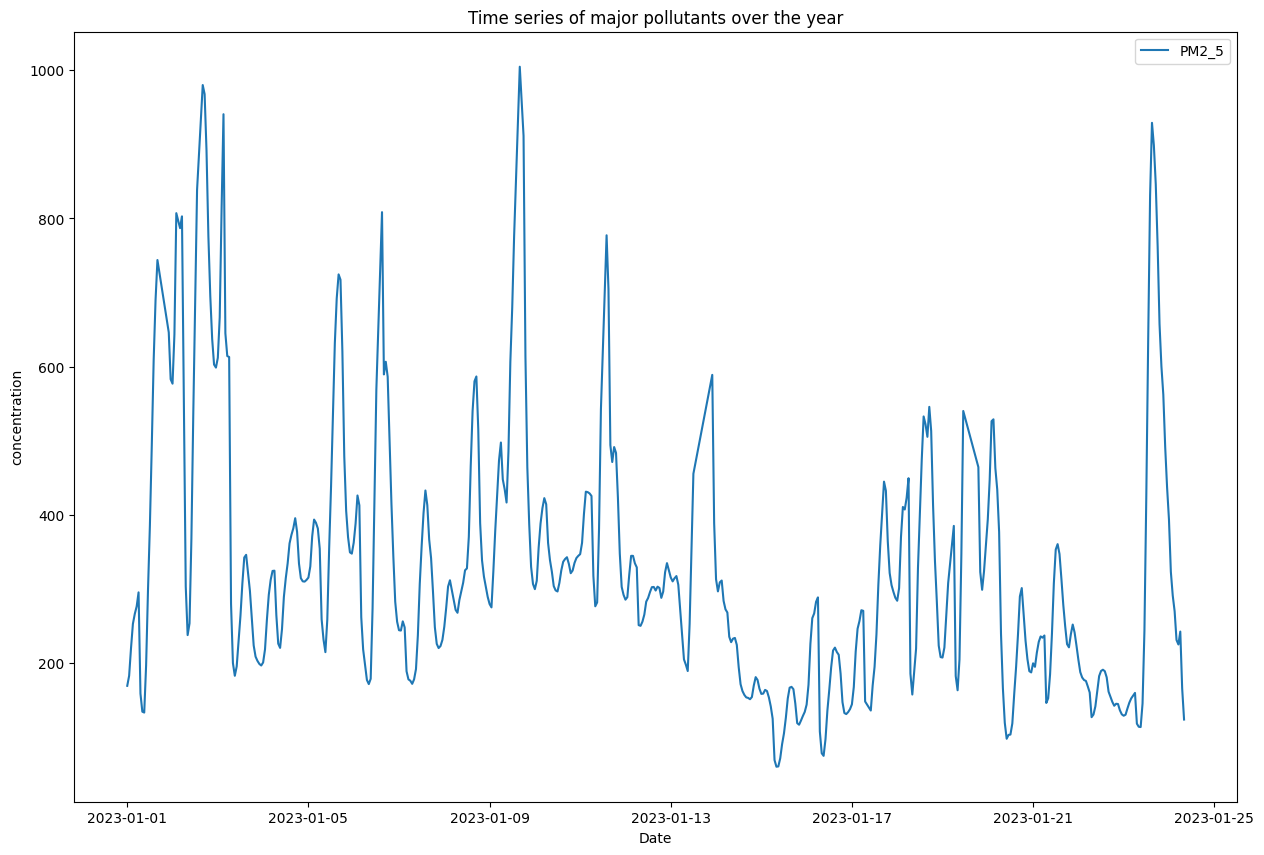

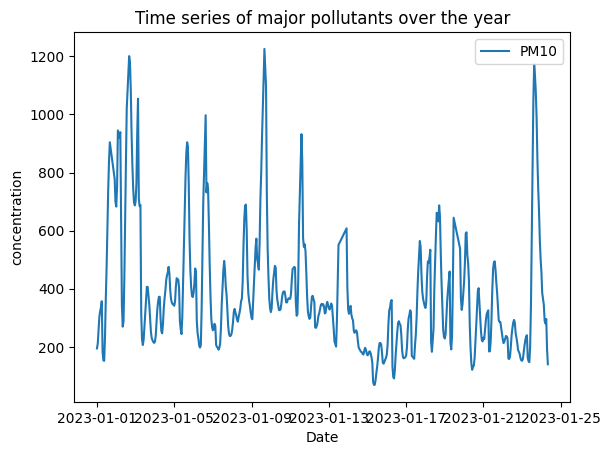

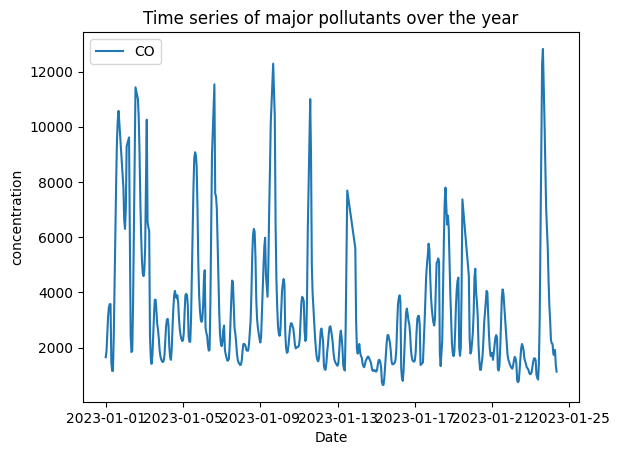

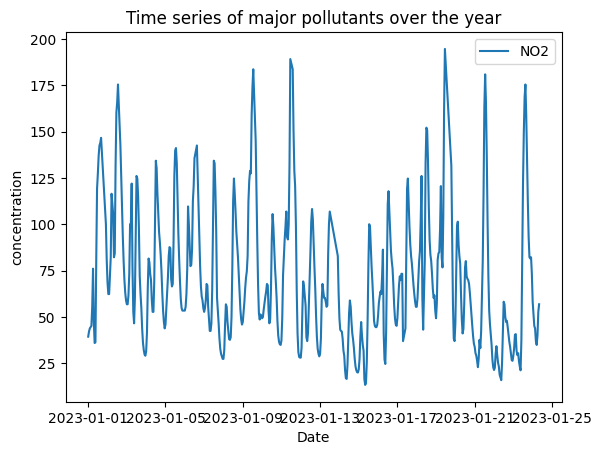

In [23]:
#time series plot for key pollutants over the year
plt.figure(figsize=(15,10))
for pollutant in ['pm2_5','pm10','co','no2']:
    plt.plot(df.index,df[pollutant],label=pollutant.upper())
    plt.title("Time series of major pollutants over the year")
    plt.xlabel('Date')
    plt.ylabel('concentration')
    plt.legend()
    plt.show()

<h3>Tools and Technologies</h3>

The analysis leverages the follwing tools and libraries:
Programming language:Python
Libraries:
Data Manipulation:pandas,numpy
visualization:matplotlib,seaborn,plotly,folium,geopandas
Statistical Analysis:statsmodels,scipy
Machine Learning:scikit-learn,fbprophet
Geospatial analysis:geopandas,folium

<h3>Conclusion</h3>

Through this comprehensive analysis,we aim to unreveal the complex dynamics of air quality in delhi,identifying critical pollutants,understanding seasonal and geographical influences,and assessing the broader implications on public health.the insights derives will serve as a foundation for developing targeted strategies to enhance air quality and safe-guard the well being of Delhis residents.